#**"House Price Prediction: Exploring Regression Models for Real Estate Valuation"**

In [359]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from scipy import stats
from sklearn.svm import SVR
from sklearn import svm

In [360]:
#Load and Read the  CSV file as DataFrame
df = pd.read_csv('/content/drive/MyDrive/sample_dataset (1) (1) (1) (1) (1) (2) (1) (4) (3).csv')

In [361]:
#Shape and columns the DataFrame
df.shape

(1000, 10)

In [362]:
#Checking null values
df.isnull().sum()

ID             0
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [363]:
#Each column info
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           1000 non-null   int64
 1   OverallQual  1000 non-null   int64
 2   GrLivArea    1000 non-null   int64
 3   YearBuilt    1000 non-null   int64
 4   TotalBsmtSF  1000 non-null   int64
 5   FullBath     1000 non-null   int64
 6   HalfBath     1000 non-null   int64
 7   GarageCars   1000 non-null   int64
 8   GarageArea   1000 non-null   int64
 9   SalePrice    1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


#### From above we get to know about basic understanding of dataset. Dataset have 1000 rows with 10 columns with no null values and features having int data type

In [364]:
df.head()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [365]:
df.tail()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
995,996,2,863,1947,1381,4,1,4,58,258966
996,997,8,1392,1963,203,2,0,1,553,348957
997,998,2,921,2005,1705,3,0,0,600,233760
998,999,8,3252,1930,3016,4,2,4,203,394155
999,1000,9,3336,1953,1961,2,0,2,26,214000


In [366]:
# Count of different data types

obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 10
Float variables: 0


## Check Outliers:-

In [367]:
# Detect outliers using Z-score
numerical_features = df.select_dtypes(include=['int64'])
z_scores = stats.zscore(numerical_features)
abs_z_scores = abs(z_scores)
outlier_indices = (abs_z_scores > 3).any(axis=1)
outliers = numerical_features[outlier_indices]
print("Outlier data points detected using Z-score:")
print(outliers)

Outlier data points detected using Z-score:
Empty DataFrame
Columns: [ID, OverallQual, GrLivArea, YearBuilt, TotalBsmtSF, FullBath, HalfBath, GarageCars, GarageArea, SalePrice]
Index: []


<Axes: >

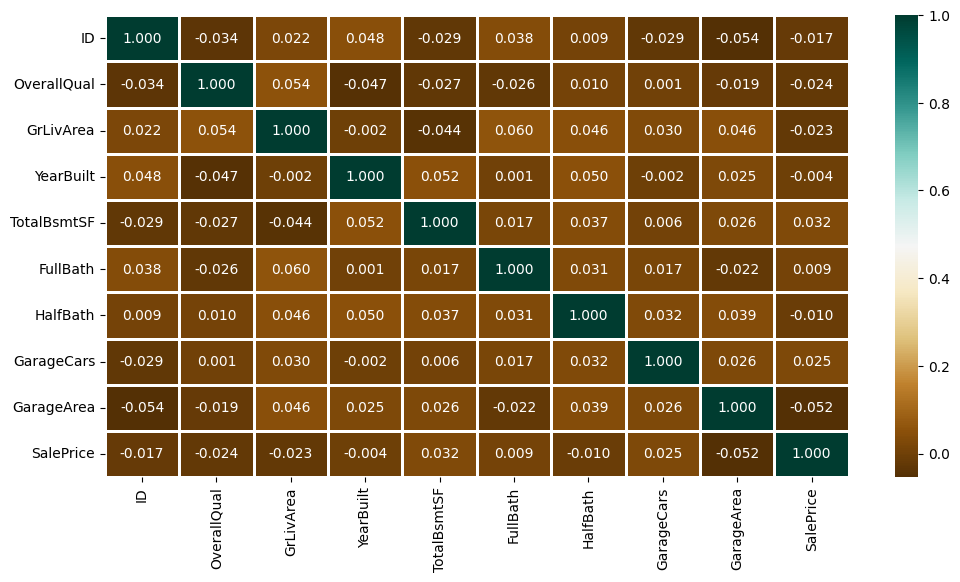

In [368]:
#Plot heatmap to understand correlation between all features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.3f',
            linewidths = 2,
            annot = True)

In [369]:
#Create new common feature for bathrooms
df['TotalBathrooms'] = df['FullBath'] + 0.5 * df['HalfBath']

In [370]:
df.corr()

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice,TotalBathrooms
ID,1.000000,-0.033638,0.021586,0.047812,-0.029253,0.037996,0.009475,-0.029090,-0.053958,-0.017432,0.038601
OverallQual,-0.033638,1.000000,0.054348,-0.047398,-0.027117,-0.026321,0.009616,0.001110,-0.019213,-0.023987,-0.021361
GrLivArea,0.021586,0.054348,1.000000,-0.001860,-0.043779,0.060206,0.045500,0.030373,0.046051,-0.022882,0.071300
YearBuilt,0.047812,-0.047398,-0.001860,1.000000,0.051829,0.000738,0.050184,-0.001940,0.025297,-0.004240,0.017371
TotalBsmtSF,-0.029253,-0.027117,-0.043779,0.051829,1.000000,0.017190,0.037160,0.006063,0.025627,0.031701,0.028392
FullBath,0.037996,-0.026321,0.060206,0.000738,0.017190,1.000000,0.030548,0.016779,-0.021539,0.009416,0.943185
HalfBath,0.009475,0.009616,0.045500,0.050184,0.037160,0.030548,1.000000,0.031865,0.039001,-0.009761,0.360925
GarageCars,-0.029090,0.001110,0.030373,-0.001940,0.006063,0.016779,0.031865,1.000000,0.026021,0.024781,0.026248
GarageArea,-0.053958,-0.019213,0.046051,0.025297,0.025627,-0.021539,0.039001,0.026021,1.000000,-0.051827,-0.007132
SalePrice,-0.017432,-0.023987,-0.022882,-0.004240,0.031701,0.009416,-0.009761,0.024781,-0.051827,1.000000,0.005541


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'FullBath'}>],
       [<Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'GarageArea'}>],
       [<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'TotalBathrooms'}>, <Axes: >]],
      dtype=object)

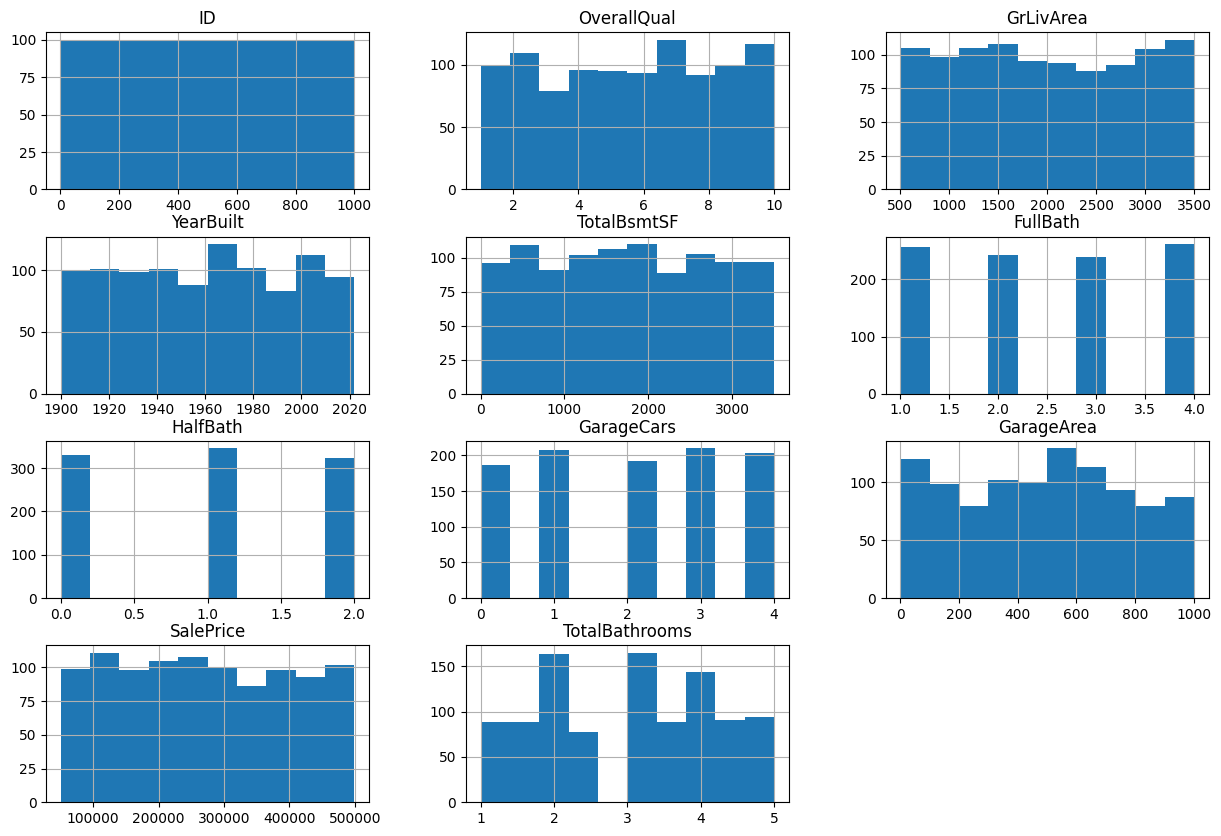

In [371]:
df.hist(figsize  =(15,10))

(-0.5, 9.5, 0.0, 800000.0)

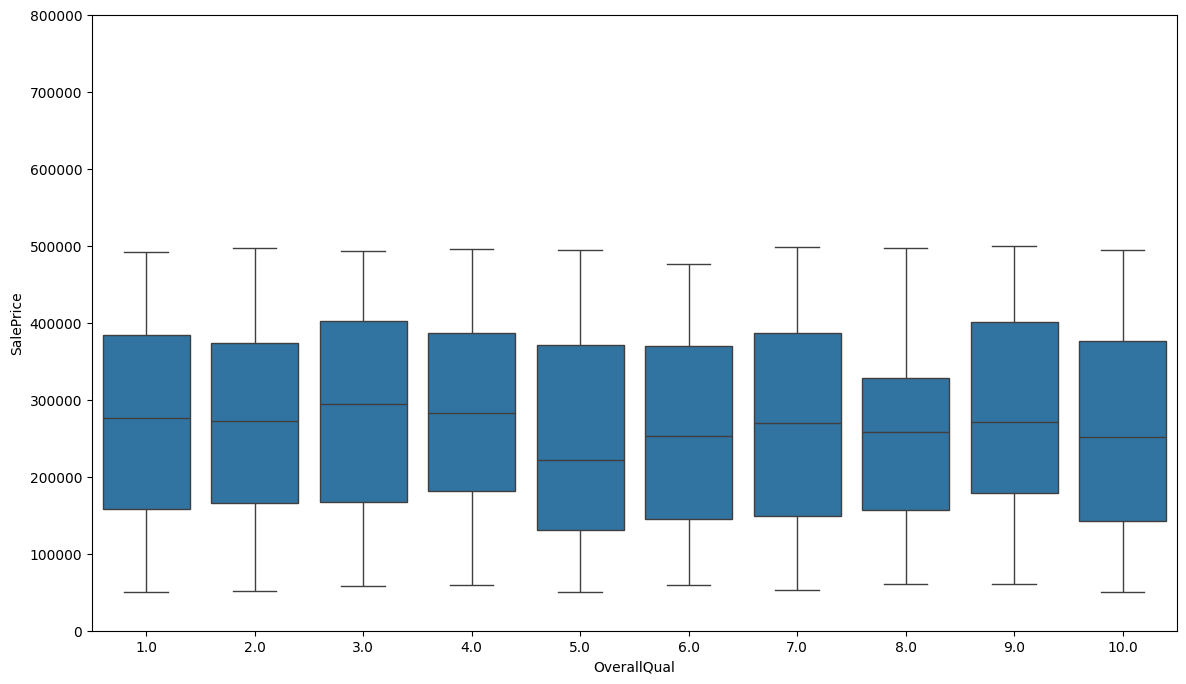

In [372]:
# Plot OverallQual Vs SalePrice
data = pd.concat([df['SalePrice'], train_data['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin= 0, ymax=800000)

In [373]:
#df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [374]:
# Find highly correlated features
correlation_matrix = df.corr()
threshold = 0.8
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add(colname_i)
            highly_correlated_features.add(colname_j)

print("Highly correlated features:", highly_correlated_features)

Highly correlated features: {'FullBath', 'TotalBathrooms'}


In [375]:
# Correlation between 'GarageCars' and 'GarageArea' columns
df[['GarageCars', 'GarageArea']].corr()

,GarageCars,GarageArea
GarageCars,1.000000,0.026021
GarageArea,0.026021,1.000000


#### As per observation, Garage Area increase then obviously Garage car capacity will increases, and for house sales prediction, our focus is on area, so we will consider Garage Area because both features are correlated.

In [376]:
# Drop the unnecessary features
df.drop(['ID','FullBath','HalfBath','GarageCars'],axis=1,inplace=True)

In [377]:
# Split the training set into training and validation set
X = df.drop(['SalePrice'], axis=1)
Y = df['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, random_state=0) # Due to small amount of data choose 90:10 split

In [378]:
train_data = X_train.join(Y_train)
train_data.head()

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,GarageArea,TotalBathrooms,SalePrice
785,10,1047,1942,611,133,2.5,305365
873,5,3244,1972,597,929,3.5,490627
65,2,3341,1905,428,307,4.0,51719
902,10,3457,1901,2039,746,2.5,477908
317,4,1117,1980,2469,545,4.5,366690


## Comapre all the best Regression Models:-

In [379]:
# Define the models
models = {
    'SVR': svm.SVR(),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)

    # Calculate MAPE
    mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2, 'MAPE': mape}

# Print results
print("Model Evaluation Results:")
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  RMSE: {metrics['RMSE']:.2f}")
    print(f"  R2: {metrics['R2']:.2f}")
    print(f"  MAPE: {metrics['MAPE']:.2f}%\n")


Model Evaluation Results:
Model: SVR
  MAE: 108758.76
  MSE: 15988290917.59
  RMSE: 126444.81
  R2: -0.02
  MAPE: 57.84%

Model: Random Forest
  MAE: 104405.34
  MSE: 15552358870.85
  RMSE: 124709.10
  R2: 0.01
  MAPE: 55.22%

Model: Linear Regression
  MAE: 108711.58
  MSE: 15967299508.82
  RMSE: 126361.78
  R2: -0.02
  MAPE: 58.20%

Model: Decision Tree
  MAE: 132701.54
  MSE: 27936849001.94
  RMSE: 167143.20
  R2: -0.78
  MAPE: 63.96%

Model: XGBoost
  MAE: 115327.31
  MSE: 20300310021.05
  RMSE: 142479.16
  R2: -0.29
  MAPE: 61.15%

Model: Lasso
  MAE: 108711.49
  MSE: 15967270911.24
  RMSE: 126361.67
  R2: -0.02
  MAPE: 58.20%

Model: Ridge
  MAE: 108711.42
  MSE: 15967250777.98
  RMSE: 126361.59
  R2: -0.02
  MAPE: 58.20%

Model: Gradient Boosting
  MAE: 112609.10
  MSE: 18024769747.62
  RMSE: 134256.36
  R2: -0.15
  MAPE: 60.85%



## Choose Best Model:-

In [380]:
# Define evaluation metrics for each model
evaluation_metrics = {
    'MAE': 'min',
    'MSE': 'min',
    'RMSE': 'min',
    'R2': 'max',
    'MAPE': 'min'
}

# Find the best model based on evaluation metrics
best_model_name = None
best_model_metrics = None
for name, metrics in results.items():
    if best_model_name is None or all((metrics[metric_name] < best_model_metrics[metric_name])
                                      if evaluation_metrics[metric_name] == 'min' else
                                      (metrics[metric_name] > best_model_metrics[metric_name])
                                      for metric_name in evaluation_metrics.keys()):
        best_model_name = name
        best_model_metrics = metrics

# Print the best model and its evaluation metrics
print(f"Best Model: {best_model_name}")
print("Evaluation Metrics:")
for metric_name, metric_value in best_model_metrics.items():
    print(f"  {metric_name}: {metric_value:.2f}")

Best Model: Random Forest
Evaluation Metrics:
  MAE: 104405.34
  MSE: 15552358870.85
  RMSE: 124709.10
  R2: 0.01
  MAPE: 55.22


### Hyperparameter Tuning:-


In [381]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 25, 30, 35, 40, 45, 50, 100, 150, 200],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [382]:
# Instantiate the Random Forest Model
rf_regressor = RandomForestRegressor(random_state = 0)

In [383]:
# Perform grid search
grid_search = GridSearchCV(rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, Y_train)

In [384]:
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Get the score
best_model.score(X_test,Y_test)

In [385]:
# Make predictions on the test set using the best model
Y_pred = best_model.predict(X_test)

In [386]:
Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Print evaluation metrics
print("Evaluation Metrics for Random Forest Model:")
print(f"  Mean Squared Error (MSE): {mse:.2f}")
print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"  R-squared (R2): {r2:.2f}")
print(f"  MAPE: {metrics['MAPE']:.2f}%\n")

### Cross-Validation (K-Fold):-

In [387]:
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
num_folds = 10

In [388]:
# Initialize lists to store evaluation metric scores for each fold
mse_scores = []
mae_scores = []
rmse_scores = []
r2_scores = []
mape_scores = []

# Initialize the KFold splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

In [389]:
# Iterate over each fold
for train_index, valid_index in kf.split(X_train):
    X_train_fold, X_valid_fold = X_train.iloc[train_index], X_train.iloc[valid_index]
    Y_train_fold, Y_valid_fold = Y_train.iloc[train_index], Y_train.iloc[valid_index]

    # Initialize and fit the RandomForestRegressor on the training fold
    model_rf = RandomForestRegressor(random_state=0)
    model_rf.fit(X_train_fold, Y_train_fold)

    # Make predictions on the validation fold
    Y_pred_fold = model_rf.predict(X_valid_fold)

    # Calculate evaluation metrics for the fold and store them
    mse_fold = mean_squared_error(Y_valid_fold, Y_pred_fold)
    mae_fold = mean_absolute_error(Y_valid_fold, Y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)
    r2_fold = r2_score(Y_valid_fold, Y_pred_fold)
    mape_fold = np.mean(np.abs((Y_valid_fold - Y_pred_fold) / Y_valid_fold)) * 100

    mse_scores.append(mse_fold)
    mae_scores.append(mae_fold)
    rmse_scores.append(rmse_fold)
    r2_scores.append(r2_fold)
    mape_scores.append(mape_fold)

In [390]:
# Calculate the mean scores across all folds
mean_mse = np.mean(mse_scores)
mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2_scores)
mean_mape = np.mean(mape_scores)

print("Mean MSE across all folds:", mean_mse)
print("Mean MAE across all folds:", mean_mae)
print("Mean RMSE across all folds:", mean_rmse)
print("Mean R-squared across all folds:", mean_r2)
print("Mean Absolute Percentage Error (MAPE) across all folds:", mean_mape)

Mean MSE across all folds: 18786224106.79938
Mean MAE across all folds: 117740.59375555554
Mean RMSE across all folds: 136967.6997318427
Mean R-squared across all folds: -0.1320505905793778
Mean Absolute Percentage Error (MAPE) across all folds: 70.52894000808966


#### By applying hyperparameter tuning on the Random Forest Model instead of getting best fit/result it's all the evaluation metrics increased. Even applying cross validation all metrics including MAPE is incresed too much. As compare to all the result without using hyper parameter and K-Fold Random Forest giving good result.

## Fit the Best Model:-

In [391]:
# Fit the model
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor(random_state=0)

# Train the model using the training data (X_train, Y_train)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [392]:
# This function will predict the price for house:

def predict_price(OverallQual, GrLivArea, YearBuilt, TotalBsmtSF, TotalBathrooms, GarageArea):
    # Create an input array with the provided features
    x = np.array([OverallQual, GrLivArea, YearBuilt, TotalBsmtSF, TotalBathrooms, GarageArea]).reshape(1, -1)

    # Use the trained Random Forest model to make predictions
    predicted_price = rf_regressor.predict(x)
    return predicted_price[0]

In [396]:
# Example usage:
predicted_price = predict_price(7, 2007, 1907, 1320, 3, 366)
print("Predicted price:", predicted_price)

Predicted price: 226198.05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Model Save:-

In [394]:
import pickle

# Save the trained model to a file
pickle.dump(model,open('/content/random_forest_model', 'wb'))

## Conclusion:-

In [395]:
"""
1. Upon evaluating several regression models on the provided dataset, it is evident that the dataset size and the chosen train-test split may
have limited the accuracy of the models. Despite these constraints, one model stands out for its relatively superior performance: the Random Forest Regreassor.
2.It's important to note that the performance metrics achieved by the models may not reflect their true potential due to the limited size of the dataset
and the simple train-test split employed within same data.
3. Additionally, the absence of missing values and categorical features, as well as the lack of significant correlations
between the predictors and the target variable, further constrained the predictive capabilities of the models.


“Basically, for better accuracy ,we will need more data and more features, so our model didn't confuse. We get better correlation between dependent and independent features. In given sample dataset
there was only 1000 x 10 data, which is not sufficient to predict house prices. Even from the same dataset we split test train data, so the obvious model didn't perform well.
By implementing these improvements, we can enhance the accuracy and predictive power of our regression model, enabling more reliable predictions of house sale prices in real-world scenarios.”

"""

"\n1. Upon evaluating several regression models on the provided dataset, it is evident that the dataset size and the chosen train-test split may \nhave limited the accuracy of the models. Despite these constraints, one model stands out for its relatively superior performance: the Random Forest Regreassor.\n2.It's important to note that the performance metrics achieved by the models may not reflect their true potential due to the limited size of the dataset \nand the simple train-test split employed within same data. \n3. Additionally, the absence of missing values and categorical features, as well as the lack of significant correlations \nbetween the predictors and the target variable, further constrained the predictive capabilities of the models.\n\n\n“Basically, for better accuracy ,we will need more data and more features, so our model didn't confuse. We get better correlation between dependent and independent features. In given sample dataset\nthere was only 1000 x 10 data, which i